# Лабораторная работа №2. Метаэвристические методы оптимизации

In [4]:
!conda install -c conda-forge pygmo

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [1]:
!python3 --version

Python 3.9.13


In [18]:
import pygmo as pg

import numpy as np
from matplotlib import pyplot as plt
import cv2

### Функция Швефеля
x,y от -10 до 10

глобальный экстремум 0

точка глобального экстремума (0, 0)

In [17]:
class Shvefel:
    def __init__(self):
        self.dim = 2
        
    def fitness(self, x: np.ndarray) -> np.float64:
        return [x[0] * x[0] + (x[0] + x[1]) ** 2]

    def get_bounds(self):
        return ([-10] * self.dim, [10] * self.dim)

In [18]:
prob = pg.problem(Shvefel())
print(prob) 

Problem name: <class '__main__.Shvefel'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [20]:
#Алгоритм колонии пчел
algo = pg.algorithm(pg.bee_colony(gen = 20, limit = 20))
pop = pg.population(prob, size = 5)
pop = algo.evolve(pop)
print(pop.champion_f)

[0.00623593]


In [27]:
#Алгоритм серых волков
algo = pg.algorithm(pg.gwo(gen = 10))
pop = pg.population(prob, size = 5)
pop = algo.evolve(pop)
print(pop.champion_f)

[0.12139939]


### Решение своей задачи
Трансформация изображения в поверхность и поиск на ней минимума

(186, 330)


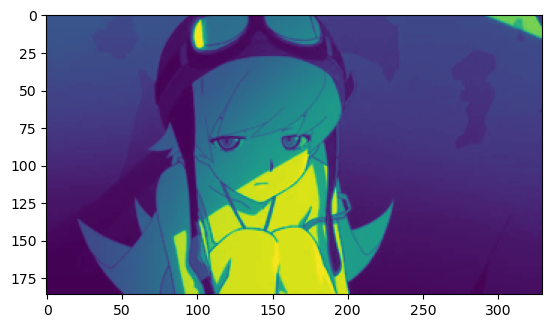

In [19]:
img_path = "./media/Bakenobu.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
print(img.shape)

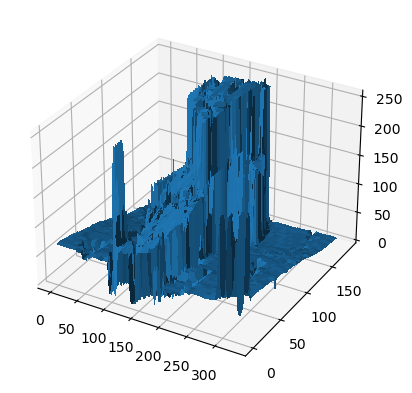

In [24]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Plot the surface.
X = np.arange(0, 330, 1)
Y = np.arange(0, 186, 1)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, img, linewidth=0, antialiased=False)
plt.show()

In [39]:
class Image:
    def __init__(self, img):
        self.dim = 2
        self.data = img
        
    def fitness(self, x: np.ndarray) -> np.float64:
        return [self.data[int(x[0])][int(x[1])]]

    def get_bounds(self):
        return ([0] * self.dim, [185, 329])

In [40]:
prob = pg.problem(Image(img))
print(prob) 

Problem name: <class '__main__.Image'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0]
	Upper bounds: [185, 329]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [41]:
#Алгоритм колонии пчел
algo = pg.algorithm(pg.bee_colony(gen = 20, limit = 20))
pop = pg.population(prob, size = 5)
pop = algo.evolve(pop)
print(pop.champion_f)

[0.]


Очевидно, минимальное значение 0. Алгоритм сработал

### Использование параллелизма через Island